# Приоритезация гипотез и A/B тестирование

В данной работе отдел маркетинга некой компании создал список гипотез для увеличения выручки. Необходимо приоритезировать эти гипотезы. 

Также необходимо провести A/B-тест и проанализировать результаты, определив, какая из групп более выгодна для бизнеса на основе количества заказов и среднего чека

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
hyp = pd.read_csv('/datasets/hypothesis.csv')
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


## 
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Создадим колонку 'ice', предварительно изменив названия колонок 

In [6]:
hyp.columns=['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [7]:
hyp['ice'] = hyp['impact'] * hyp['confidence'] / hyp['efforts'] 
display(hyp.sort_values(by='ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


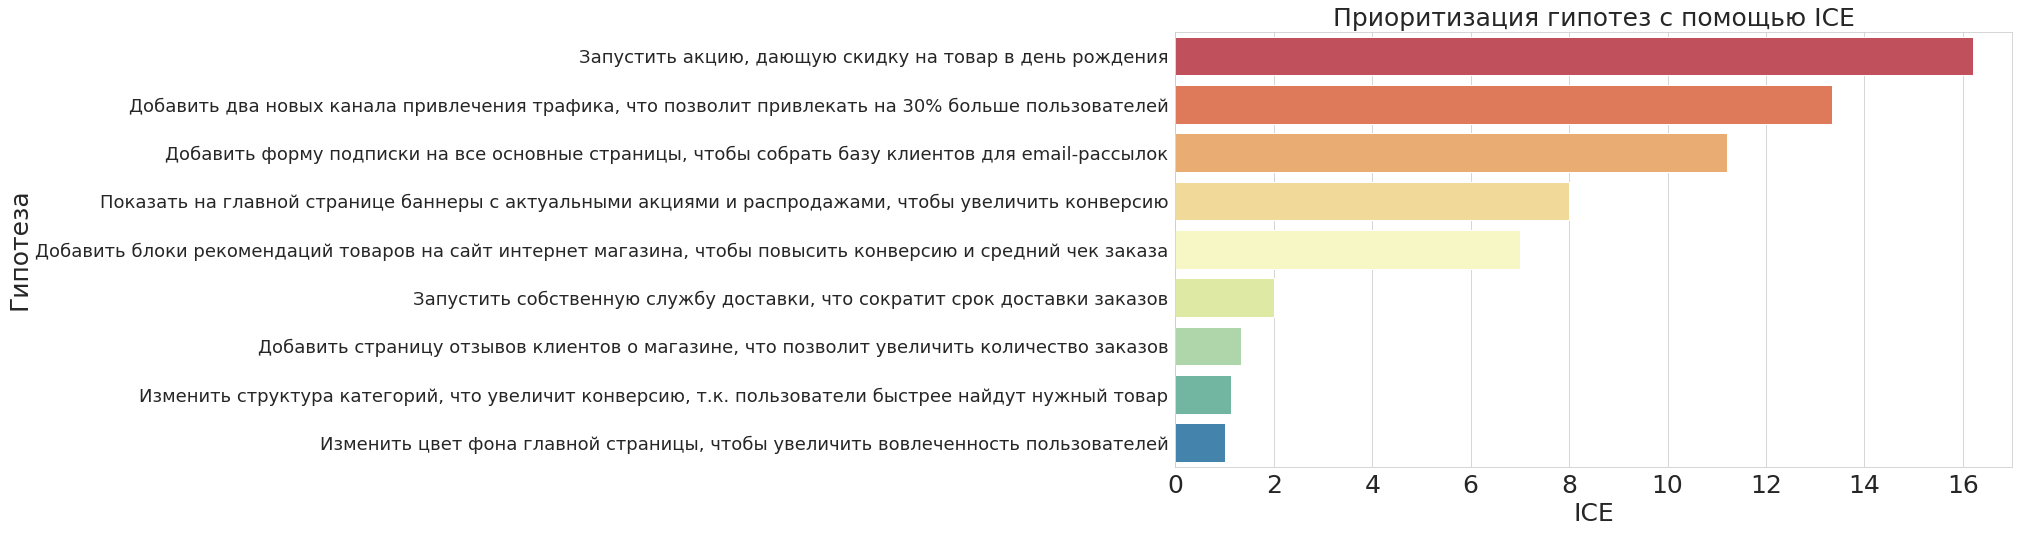

In [8]:
sns.set_style("whitegrid")

hyp=hyp.sort_values(by='ice', ascending=False)

plt.figure(figsize=(15, 8))
plt.title('Приоритизация гипотез с помощью ICE', fontsize=25)
sns.barplot(x='ice', y='hypothesis', data=hyp, palette="Spectral")

plt.ylabel('Гипотеза', fontsize=25)
plt.xlabel('ICE', fontsize=25)
plt.xticks(size=25)
plt.yticks(size=18)
plt.show()

In [9]:
hyp['rice'] = hyp['reach'] * hyp['impact'] * hyp['confidence'] / hyp['efforts']
display(hyp.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


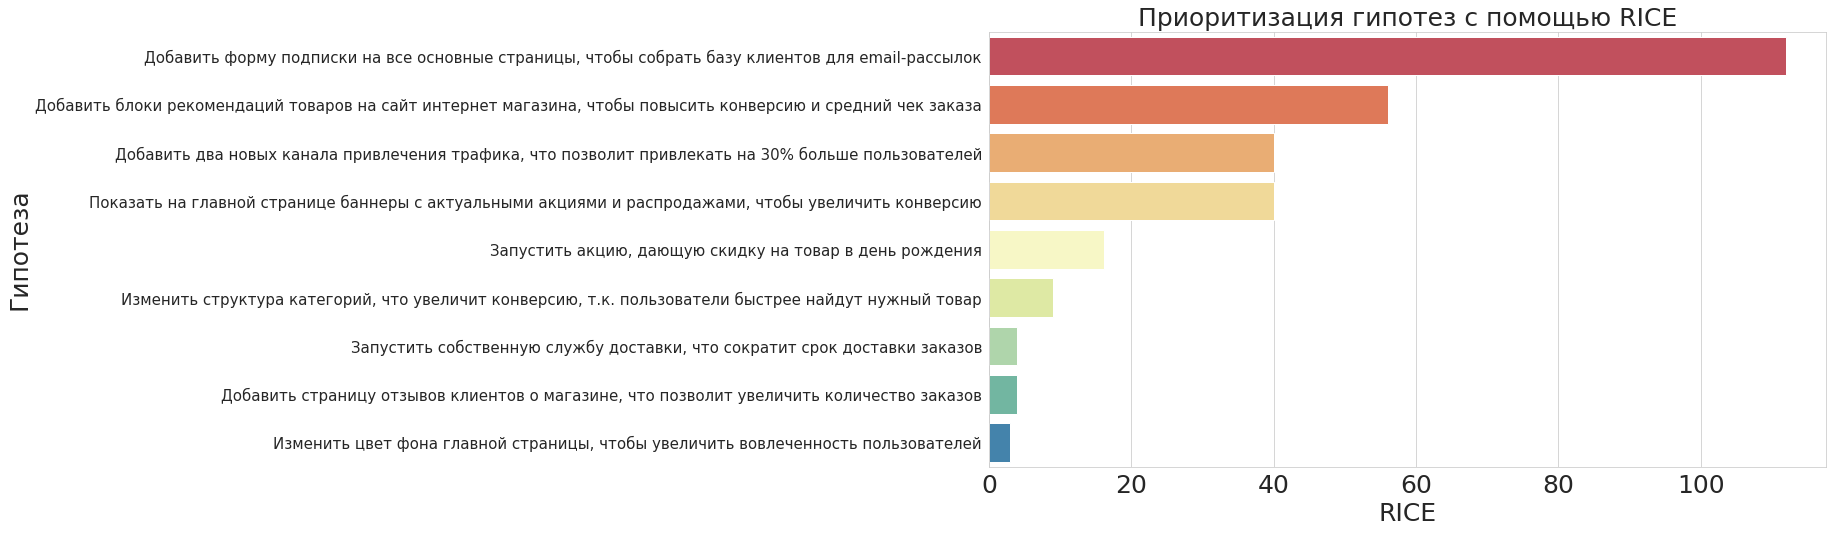

In [10]:
sns.set_style("whitegrid")

hyp=hyp.sort_values(by='rice', ascending=False)

plt.figure(figsize=(15, 8))
plt.title('Приоритизация гипотез с помощью RICE', fontsize=25)
sns.barplot(x='rice', y='hypothesis', data=hyp, palette="Spectral")

plt.ylabel('Гипотеза', fontsize=25)
plt.xlabel('RICE', fontsize=25)
plt.xticks(size=25)
plt.yticks(size=15)
plt.show()

Для начала рассмотрим блок с ICE, четыре гипотезы явно отстают от других (они же будут отставать и в случае RICE), наибольший коэффициент у гипотез:
- акция в день рождения
- добавление двух новых каналов привлечения трафика для привлечения большего количества пользователей
- добавление формы подписки на все остальные страницы для сбора бд для e-mail рассылок

В случае с RICE акция в день рождения резка теряет свою значимость из-за малого охвата ползователей. Остальные две гипотезы охватывают большое количество пользователей, соответсвенно и коэффициент RICE у них достаточно большой.

Теперь надо обработать данные

In [11]:
visitors.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

Явных дубликатов нет

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
orders.columns=['order_Id', 'user_Id', 'date', 'revenue', 'group']

In [16]:
orders.head()

,order_Id,user_Id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visitors['date']=visitors['date'].map(
    lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Итого были посчитаны коэффеициенты ICE и RICE

Также были обработаны данные на дубликаты и названия столбцов приведены к нормальному виду

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [20]:
# создаем массив уникальных пар значений дата-группа
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [21]:
# агрегированные данные по количеству заказов по дням
ordersAggregated = datesGroups.apply(
    lambda x: orders[
       np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_Id': 'nunique',
            'user_Id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
# агрегированные данные по количеству посетителей по дням
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])



In [23]:
ordersAggregated

,date,group,order_Id,user_Id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [24]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [25]:
# объеденим таблицы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


In [26]:
# найдем кумулятивную выручку для каждой группы по дням
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

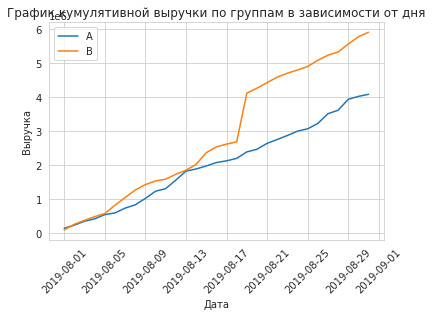

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам в зависимости от дня')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

Если не считать одного дня, когда в группе В резко выросла выручка, то в остальные дни рост выручки был равномерен, в один день был аномально большой заказ

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

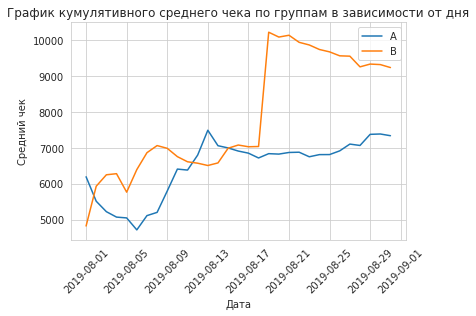

In [28]:
# сразу строим график кумулятивного среднего чека по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам в зависимости от дня')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()

Значение кумулятивное среднего чека не пришло к равновесию, выброс в группе В очень сильно повлиял на средний чек и еще очень долгое время не удастся получить выход на какое-то примерное значение по этой группе. В группе А все еще происходят колебания среднего чека

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [29]:
# объеденим данные по кумулятивной выручке
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


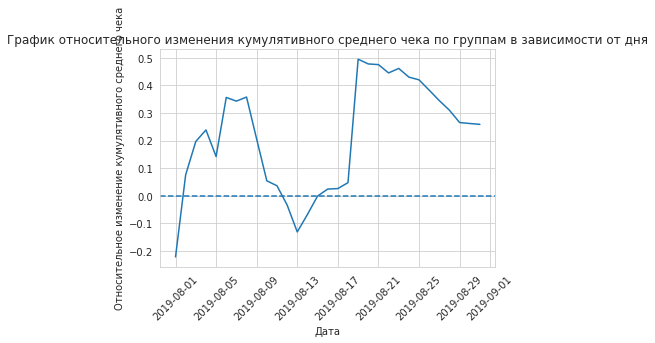

In [30]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека по группам в зависимости от дня')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека')

plt.axhline(y=0, linestyle='--')

В данном графике мы видим, что было несколько аномальных дней, когда происходил резкий скачок в относительном изменении кумулятивного среднего чека, в среднем в группе В средний чек больше, но что-то более конкретное затруднительно сказать

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [31]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [32]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [33]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

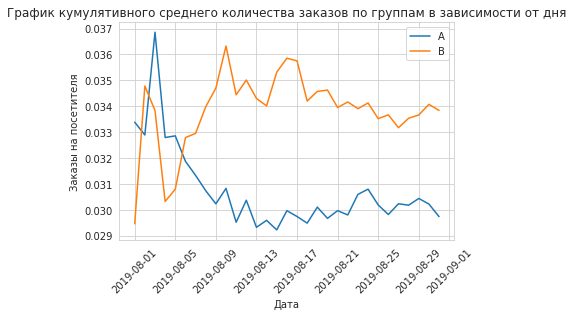

In [34]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов по группам в зависимости от дня')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Заказы на посетителя')
plt.legend()

Из графика видно, что конверсия группы В лучше, чем у группы А практически на всем протяжении теста

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

In [35]:
mergedCumulativeConversion = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversion

,date,groupA,ordersA,buyersA,revenueA,visitorsA,conversionA,groupB,ordersB,buyersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,24,20,148579,719,0.033380,B,21,20,101217,713,0.029453
1,2019-08-02,A,44,38,242401,1338,0.032885,B,45,43,266748,1294,0.034776
2,2019-08-03,A,68,62,354874,1845,0.036856,B,61,59,380996,1803,0.033833
3,2019-08-04,A,84,77,425699,2562,0.032787,B,78,75,489567,2573,0.030315
4,2019-08-05,A,109,100,549917,3318,0.032851,B,101,98,581995,3280,0.030793
5,2019-08-06,A,127,114,598401,3985,0.031870,B,129,123,824337,3935,0.032783
6,2019-08-07,A,145,131,740818,4629,0.031324,B,153,146,1049671,4644,0.032946
7,2019-08-08,A,161,146,837097,5239,0.030731,B,180,171,1270589,5298,0.033975
8,2019-08-09,A,177,159,1025603,5856,0.030225,B,205,193,1431401,5908,0.034699
9,2019-08-10,A,193,175,1236098,6262,0.030821,B,228,215,1539203,6277,0.036323


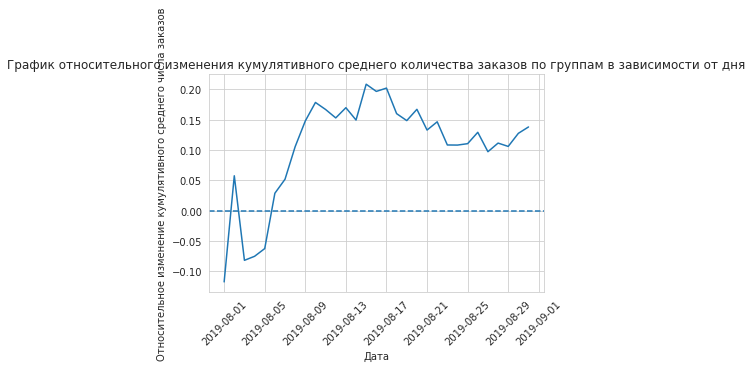

In [36]:
plt.plot(mergedCumulativeConversion['date'], (mergedCumulativeConversion['conversionB']/(mergedCumulativeConversion['conversionA'])-1))
plt.title('График относительного изменения кумулятивного среднего количества заказов по группам в зависимости от дня')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего числа заказов')
plt.axhline(y=0, linestyle='--')

Из графиков видно, что конверсия в группе В больше, чем в группе А на 10-20%

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [37]:
ordersByUsers = (
    orders.groupby('user_Id', as_index=False)
    .agg({'order_Id': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

Text(0, 0.5, 'Количество заказов')

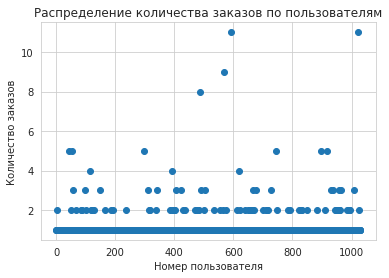

In [38]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов');

Большинство пользователей сделало 1 заказ, количество пользоватлей с 2 заказами заметно, но достаточно мало, скорее всего 95 % пересентиль будет равен 2

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

In [39]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершили 2 заказа, и не более 1% пользователей совершили 4 и более заказа

Границей определения аномалий возьмем от 3 заказов включительно, т.к. это менее 5% пользователей

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Text(0, 0.5, 'Стоимость заказа')

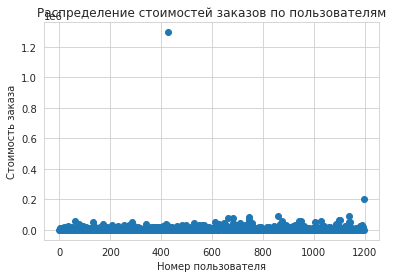

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов по пользователям')
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа')

Почти все заказы меньше 100 000, кто-то заказал более чем на 1.2 млн, что очень сильно отразилось на тестах

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [41]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


95 процентный перцентиль соответствует 28000, 99 процентный - 58233, приму за аномальное значение более 28000

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

<b>Нулевая гипотеза:</b> среднее количество заказов не изменилось

<b>Альтернативная гипотеза:</b> среднее количество заказов увеличилось

In [42]:
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [43]:
# количество заказов на пользователя
ordersByUsersA = orders[orders['group']=='A'].groupby('user_Id', as_index=False).agg({'order_Id': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [44]:
ordersByUsersB = orders[orders['group']=='B'].groupby('user_Id', as_index=False).agg({'order_Id': pd.Series.nunique})
ordersByUsersB.columns = ['userId','orders']
ordersByUsersB

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [45]:
# количество посетителей в день
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [46]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [47]:
# кумулятвное количество посетителей
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [48]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [49]:
# количество заказов в день
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_Id', 'user_Id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_Id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


In [50]:
# кумулятивное число заказов
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


In [51]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_Id', 'user_Id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_Id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [52]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [54]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [63]:
ordersByUsersA = orders[orders['group']=='A'].groupby('user_Id', as_index=False).agg({'order_Id': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [64]:
ordersByUsersB = orders[orders['group']=='B'].groupby('user_Id', as_index=False).agg({'order_Id': pd.Series.nunique})
ordersByUsersB.columns = ['userId','orders']

In [65]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [66]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [67]:
print("Значение p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное изменение количества заказов: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value: 0.017
Относительное изменение количества заказов: 0.138


Получается, что значение p-value 1.68%, значит нулевая гипотеза о равенстве средних количествах заказов не верна.
При этом количество заказов в группе В на 13.8% больше, чем в группе А

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

<b>Нулевая гипотеза:</b> средний чек не изменился

<b>Альтернативная гипотеза:</b> средний чек увеличился

In [68]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() -1))

Значение p-value: 0.729
Относительное изменение среднего чека: 0.259


Значение p-value 73%, что говорит о том, что гипотезу о равенстве средних чеков отбросить нельзя

Однако при этом средний чек вырос на 26%

Причина может быть в выбросах среднего чека

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

<b>Нулевая гипотеза:</b> средние количества заказов на посетителя по очищенным данным равны

<b>Альтернативная гипотеза:</b> средние количества заказов на посетителя по очищенным данным изменились

Отберем те данные, которые соответствуют пользоватлям, совершившим более 2 покупок или на сумму больше 28000

In [69]:
# отберем пользователей-выбросов
usersWithManyOrders = pd.concat(
[
    ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']
],
axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['user_Id']

In [70]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [71]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [72]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное изменение среднего количества заказов: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value: 0.013
Относительное изменение среднего количества заказов: 0.173


Значение p-value 1.3%, значит гипотезу о равенстве среднем количестве заказов стоит отвергнуть

Среднее количество заказов в группе В больше на 17.3%, чем в группе А

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

<b>Нулевая гипотеза:</b> Средний чек по очищенным данным одинаковый

<b>Альтернативная гипотеза:</b> средний чек по очищенным данным изменился

In [73]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_Id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_Id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)



0.738


In [74]:
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_Id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_Id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

-0.020


Значение p-value 73.8%, значит гипотезу о равенстве средних чеков нельзя отвергнуть

Однако средний чек уменьшился на 2%

## Заключение

В результате проделанной работы можно сделать следующие выводы:
- из предложенных гипотез стоит выделить
    - Добавить 2 новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для e-mail-рассылок
  У данных гипотез наибольшие коэффициенты ICE и RICE
  
- Из графиков видно, что у группы B больше средний чек и количество заказов по неочищенным данным (средний чек из-за выбросов трудно подсчитать, а количество заказов больше на 10-15%)
- Большинство людей делают только 1 заказ, при этом цана заказа в 95% случаев меньше 28.000 у.е.
- Гипотеза о равенстве средних количествах заказов по сырым данным оказалась неверной (р=0.018)
- Гипотеза о равенстве средних чеков по сырым данным имеет место быть (р=0.729), хотя средний чек вырос на 26%, причиной этого служит аномальное значение выброса, превосходящее другие на порядок
- Гипотеза о равенстве среднего количества заказов по очищенным данным оказалась неверной (р=0.013)
- Гипотеза о равенстве средних чеков у очищенных данных нельзя отвергнуть (р=0.738), при этом средний чек уменьшился на 2%

Исходя из полученных результатов можно отметить, что конверсия группы B больше, чем у группы А, хотя при этом средний чек остался примерно таким же, соответственно можно остановить тест и признать его результаты положительными.